In [1]:
!pip uninstall -y Pillow vietocr numpy
!pip install --quiet vietocr==0.3.11 Pillow==9.5.0 numpy==1.23.5

Found existing installation: pillow 11.2.1
Uninstalling pillow-11.2.1:
  Successfully uninstalled pillow-11.2.1
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 76.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

config = Cfg.load_config_from_name('vgg_transformer')

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
! wget https://vocr.vn/data/vietocr/data_line.zip
! unzip -qq -o ./data_line.zip

--2025-04-29 13:32:17--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip.1’

data_line.zip.1     100%[===================>]  58.38M   312MB/s    in 0.2s    

2025-04-29 13:32:17 (312 MB/s) - ‘data_line.zip.1’ saved [61212284/61212284]



In [20]:
config = Cfg.load_config_from_name('vgg_transformer')
dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'checkpoint':'/checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000,
          'iters': 16000,
          'batch_size': 4,
          'use_amp': True
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [21]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 4,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 16000,
  'export': './weights/transformerocr.pth',
  'checkpoint': '/checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000,
  'use_amp': True},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'ima

In [22]:
trainer = Trainer(config, pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 155382.38it/s]

valid_hw exists. Remove folder if you want to create new dataset



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 139998.14it/s]


In [23]:
trainer.config.save('config.yml')

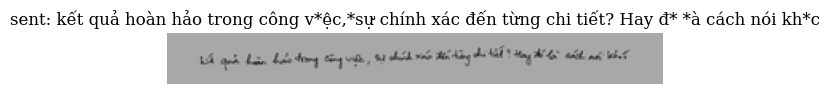

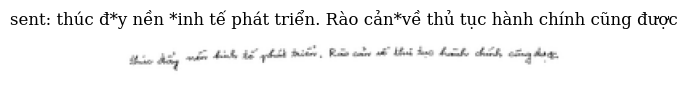

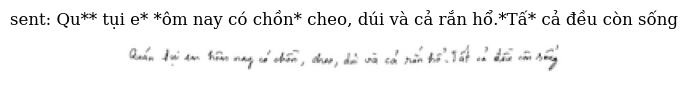

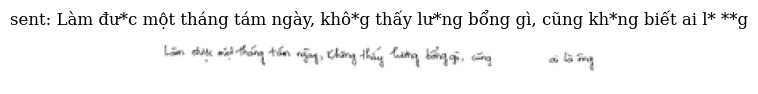

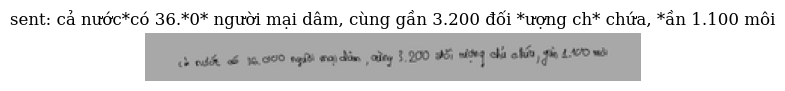

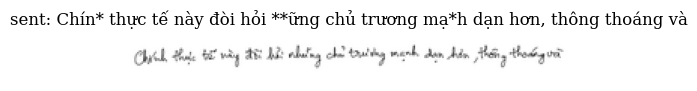

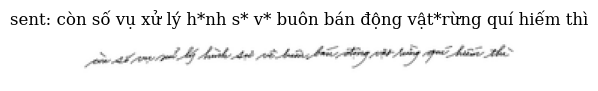

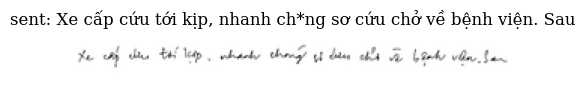

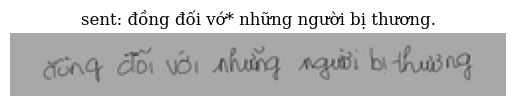

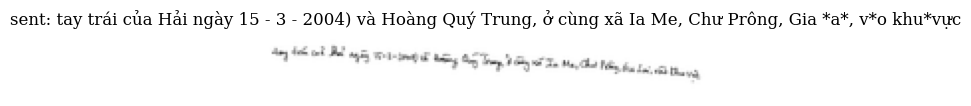

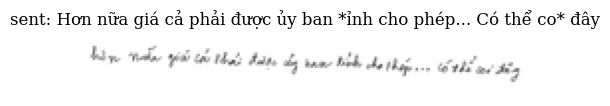

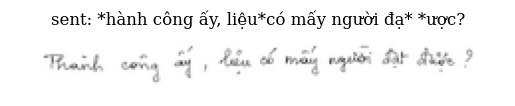

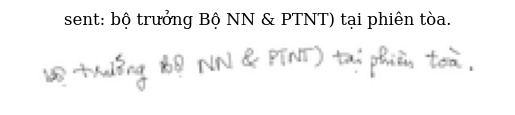

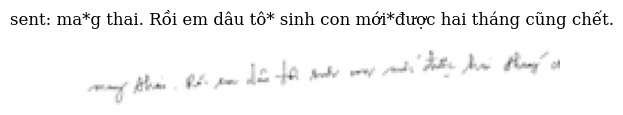

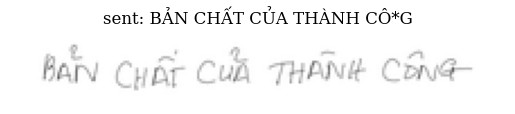

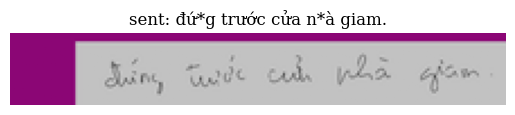

In [24]:
trainer.visualize_dataset()

In [25]:
trainer.train()

iter: 014200 - train loss: 0.950 - lr: 1.14e-05 - load time: 0.35 - gpu time: 23.34
iter: 014400 - train loss: 0.932 - lr: 9.04e-06 - load time: 0.41 - gpu time: 21.94
iter: 014600 - train loss: 0.937 - lr: 6.93e-06 - load time: 0.42 - gpu time: 22.45
iter: 014800 - train loss: 0.930 - lr: 5.10e-06 - load time: 0.48 - gpu time: 22.67
iter: 015000 - train loss: 0.939 - lr: 3.55e-06 - load time: 0.66 - gpu time: 22.36
iter: 015000 - valid loss: 0.996 - acc full seq: 0.0569 - acc per char: 0.5968
iter: 015200 - train loss: 0.923 - lr: 2.27e-06 - load time: 0.51 - gpu time: 23.55
iter: 015400 - train loss: 0.933 - lr: 1.28e-06 - load time: 0.37 - gpu time: 21.47
iter: 015600 - train loss: 0.944 - lr: 5.69e-07 - load time: 0.46 - gpu time: 22.17
iter: 015800 - train loss: 0.929 - lr: 1.43e-07 - load time: 0.49 - gpu time: 21.97
iter: 016000 - train loss: 0.923 - lr: 1.20e-09 - load time: 0.39 - gpu time: 21.82


In [26]:
config['weights'] = './weights/transformerocr.pth'

In [27]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 4,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 16000,
  'export': './weights/transformerocr.pth',
  'checkpoint': '/checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000,
  'use_amp': True},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'ima

'Chọn một bạn nan làm lớp trường.'

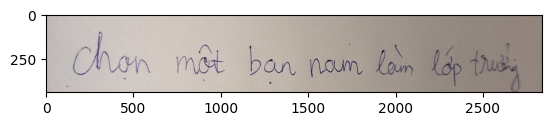

In [28]:
detector = Predictor(config)
img = '/content/drive/MyDrive/Training_Python/sample2.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [32]:
!cp ./weights/transformerocr.pth /content/drive/MyDrive/Training_Python/vietocr_weights.pth
!cp ./config.yml /content/drive/MyDrive/Training_Python/config.yml